In [2]:
## Load all required packages
%pylab inline --no-import-all
import numpy as np
import numpy
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn import metrics
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical
from keras.metrics import CategoricalAccuracy, categorical_accuracy
import seaborn as sns
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


C:\Users\meret\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
## EDA and preprocessing

In [3]:
## Load data
with np.load("training-dataset.npz") as data:
    img = data["x"] ## test dataset
    lbl = data["y"]

In [4]:
## Check shapes and types of the dataset
print(img.shape)
print(lbl.shape)
print(type(img))
print(type(lbl))

(124800, 784)
(124800,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


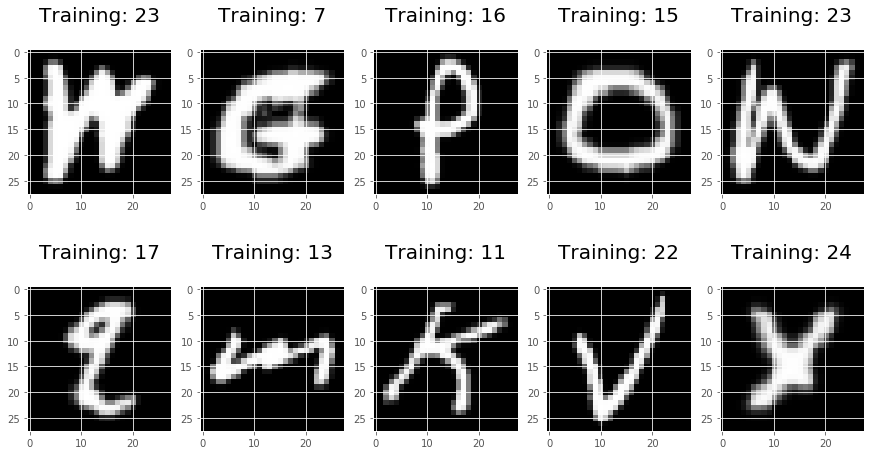

In [5]:
## Display example digits
plt.figure(figsize=(15,8))
for index, (image, label) in enumerate(zip(img[0:10], lbl[0:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)
    plt.savefig('sample.pdf')

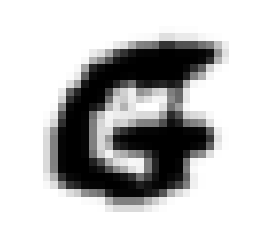

In [6]:
## Source: Hands-On Machine Learning Book
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = img[1]
#print(some_digit)
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

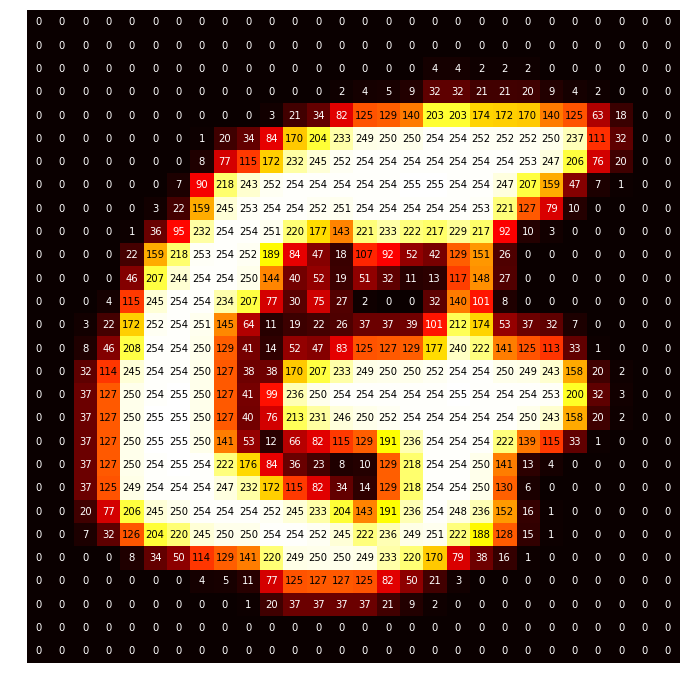

In [7]:
## Visualize one instance showing all features (28 x 28 pixels = 784)
# zero (black) indicated that the feature is zero. The darker the line, the higher the number e.g. 254.
# compare this with the picture above
def visualize_input(img, ax):
    ax.imshow(img, cmap='hot')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)

visualize_input(img[1,:].reshape(28,28), ax)

#plt.title(img[3,0])
plt.axis("off")
#plt.show()
plt.savefig('sample1.pdf')

## source: https://www.kaggle.com/darkside92/simple-best-digit-recognizer-with-cnn-top-5/comments#497794

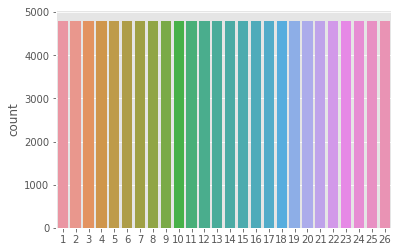

In [8]:
## Check if the labels are even distributed - this is the case
g = sns.countplot(lbl)

In [9]:
## Split into train and val sets (80 vs 20%)
x_train, x_test, y_train, y_test = train_test_split(img, lbl, test_size=0.2, random_state=0)

In [10]:
# Check the shape after the split
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(99840, 784)
(99840,)
(24960, 784)
(24960,)


In [17]:
# Change data tyoe to float and normalize pixel data
norm = MinMaxScaler()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = norm.fit_transform(x_train)
x_test = norm.fit_transform(x_test)

In [18]:
## Encode categorical label data & adjust naming
lb = LabelBinarizer()
Y = lb.fit_transform(y_train)
X = x_train
Y_test = lb.fit_transform(y_test)
X_test = x_test

In [19]:
## Check shapes
# We have now 26 classes (one for each letter)
print(X.shape)
print(Y.shape)
print(X_test.shape)
print(Y_test.shape)

(99840, 784)
(99840, 26)
(24960, 784)
(24960, 26)


In [ ]:
# Linear Models

In [21]:
## Load data
with np.load("training-dataset.npz") as data:
    img = data["x"] ## test dataset
    lbl = data["y"]

In [22]:
## Split into train and test sets (80 vs 20%)
x_train, x_test, y_train, y_test = train_test_split(img, lbl, test_size=0.2, random_state=0)

In [23]:
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [24]:
# Reshape the images data (each pixel can have a value between 0.0 to 1.0)
norm = MinMaxScaler()
x_train = norm.fit_transform(x_train)
x_test = norm.fit_transform(x_test)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

C:\Users\meret\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\meret\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [25]:
# Check the shape
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(24960, 784)
(60000,)
(24960,)


In [26]:
## Logistic Regression
# In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option 
# is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’. 
logisticRegr = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, verbose = 1, random_state=0)

In [27]:
# Fit the model
logisticRegr.fit(x_train, y_train)

C:\Users\meret\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:718: UserWarning: lbfgs failed to converge. Increase the number of iterations.
  warnings.warn("lbfgs failed to converge. Increase the number "
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.4s finished


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=1, warm_start=False)

In [28]:
# Make predictions with the test set
predictions = logisticRegr.predict(x_test)
print(predictions[0:10,])

[25 22 14 26 15 11 24  7  8 25]


In [30]:
acc = accuracy_score(predictions, y_test)
print("Accuracy: {:.3}".format(acc))

Accuracy: 0.71


In [31]:
## SGD Classifier from sklearn
sgd_clf = SGDClassifier(loss='log', random_state=0, verbose=0)
result = sgd_clf.fit(x_train, y_train)

C:\Users\meret\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [32]:
acc_sgd = accuracy_score(sgd_clf.predict(x_test), y_test)
print(acc_sgd)

0.6084134615384615


In [ ]:
## Non-linear models

In [33]:
## Random Forest Classifier from sklearn
rdf_clf = RandomForestClassifier(random_state=0)
rdf_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [34]:
acc_rdf = accuracy_score(rdf_clf.predict(x_test), y_test)
print(acc_rdf)

0.8080929487179487


In [35]:
## Multi-layer perceptron classifier from sklearn ## TBC: Shall we use different parameters, how can we
# get the validation score
mlp = MLPClassifier(hidden_layer_sizes=(128,), activation='relu', alpha=0.0001,
                    solver='adam', tol=1e-4, random_state=0, validation_fraction=0.1,
                    learning_rate_init=.001, verbose=True)

In [36]:
mlp.fit(x_train, y_train)

Iteration 1, loss = 1.26296500
Iteration 2, loss = 0.77030613
Iteration 3, loss = 0.61417882
Iteration 4, loss = 0.52518953
Iteration 5, loss = 0.46789689
Iteration 6, loss = 0.42341176
Iteration 7, loss = 0.39125236
Iteration 8, loss = 0.36423014
Iteration 9, loss = 0.34300954
Iteration 10, loss = 0.32341237
Iteration 11, loss = 0.30730366
Iteration 12, loss = 0.29312970
Iteration 13, loss = 0.28080188
Iteration 14, loss = 0.26903393
Iteration 15, loss = 0.25897718
Iteration 16, loss = 0.24855270
Iteration 17, loss = 0.24105216
Iteration 18, loss = 0.23304699
Iteration 19, loss = 0.22585185
Iteration 20, loss = 0.21830132
Iteration 21, loss = 0.21227052
Iteration 22, loss = 0.20483235
Iteration 23, loss = 0.19940696
Iteration 24, loss = 0.19551802
Iteration 25, loss = 0.18888035
Iteration 26, loss = 0.18351588
Iteration 27, loss = 0.17895063
Iteration 28, loss = 0.17291835
Iteration 29, loss = 0.17003780
Iteration 30, loss = 0.16608965
Iteration 31, loss = 0.16193076
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(128,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [39]:
acc_mlp = accuracy_score(mlp.predict(x_test), y_test)
print("Accuracy: {:.3}".format(acc_mlp))

Accuracy: 0.863


In [40]:
## Encode categorical label data

lb = LabelBinarizer()
Y = lb.fit_transform(y_train)
X = x_train
Y_test = lb.fit_transform(y_test)
X_test = x_test

In [41]:
## Check the shape
print(X.shape)
print(Y.shape)
print(X_test.shape)
print(Y_test.shape)

(60000, 784)
(60000, 26)
(24960, 784)
(24960, 26)


In [42]:
## Define a multi perceptron model #TBC: Shall we also use CNN?
model = Sequential()
# Add two hidden layers, use the relu activation
# Input dimenstion has to be equal to the number of features in our case pixels
model.add(Dense(256, input_dim=784, activation='relu'))
model.add(Dense(128, activation='relu'))
# The final layer uses softmax activation function since we are looking into a multiclass classification problem
model.add(Dense(26, activation='softmax'))
# Use the Adam optimizer. Adam works similar to regular SGD 
lr = 0.001
opt = Adam(lr)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ["accuracy", "categorical_accuracy"])

Instructions for updating:
Colocations handled automatically by placer.


In [43]:
# training the model and saving metrics in history
history = model.fit(X, Y,
          batch_size=128, epochs=5,
          verbose=1,
          validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 24960 samples
Epoch 1/5
60000/60000 [==============================] - 8s 127us/step - loss: 0.9477 - accuracy: 0.7237 - categorical_accuracy: 0.7237 - val_loss: 0.5743 - val_accuracy: 0.8276 - val_categorical_accuracy: 0.8276
Epoch 2/5
60000/60000 [==============================] - 7s 113us/step - loss: 0.4660 - accuracy: 0.8562 - categorical_accuracy: 0.8562 - val_loss: 0.4476 - val_accuracy: 0.8611 - val_categorical_accuracy: 0.8611
Epoch 3/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.3596 - accuracy: 0.8850 - categorical_accuracy: 0.8850 - val_loss: 0.3931 - val_accuracy: 0.8747 - val_categorical_accuracy: 0.8747
Epoch 4/5
60000/60000 [==============================] - 6s 93us/step - loss: 0.3029 - accuracy: 0.9015 - categorical_accuracy: 0.9015 - val_loss: 0.3910 - val_accuracy: 0.8768 - val_categorical_accuracy: 0.8768
Epoch 5/5
60000/60000 [=============================

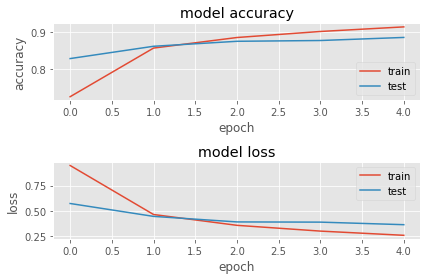

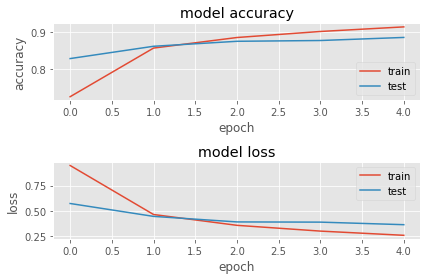

In [44]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [51]:
loss_and_metrics_train = model.evaluate(X, Y, verbose=2)
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Train Loss", loss_and_metrics_train[0])
print("Train Accuracy", loss_and_metrics_train[1])
print()
print("Validation Loss", loss_and_metrics[0])
print("Validation Accuracy", loss_and_metrics[1])

Train Loss 0.21846950722734135
Train Accuracy 0.9280666708946228

Validation Loss 0.36594764296060955
Validation Accuracy 0.8852163553237915


In [52]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

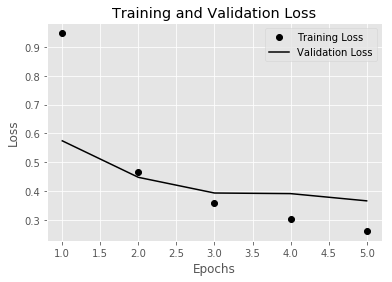

In [54]:
epochs = range(1, 6)

plt.plot(epochs, loss, 'ko', label = 'Training Loss')
plt.plot(epochs, val_loss, 'k', label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.savefig('Training and Validation Loss.png')

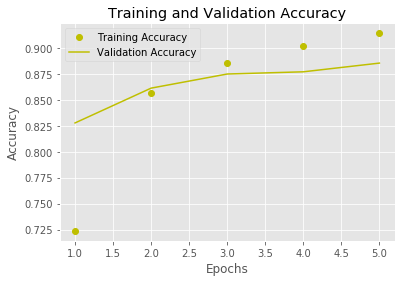

In [55]:
plt.plot(epochs, acc, 'yo', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'y', label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.savefig('Training and Validation Accuracy.png')

In [56]:
## Compare model with different parameters

settings = []

for a in ['tanh', 'relu']:
    for o in ['adam', 'sgd']:
        for e in [1, 5, 10]:
            for b in [32, 64, 128]:
                model = Sequential()
                model.add(Dense(256, input_dim=784, activation=a))
                model.add(Dense(128, activation=a))
                model.add(Dense(26, activation='softmax'))
                model.compile(optimizer=o, loss='categorical_crossentropy', metrics = ["accuracy"]) 
                model.fit(X, Y, batch_size=b, epochs=e, verbose=1, validation_split=0.1)
                score = model.evaluate(X_test, Y_test, verbose=1)
                settings.append((a, o, e, b, score[0], score[1]))
                print(settings[-1])

best_loss = min(settings, key=lambda x: x[-2])
best_accuracy =  max(settings, key=lambda x: x[-1])
print("Best settings according to loss {}".format(best_loss))
print("Best settings according to accuracy {}".format(best_accuracy))

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
24960/24960 [==============================] - 1s 51us/step
('tanh', 'adam', 1, 32, 0.5836030491460592, 0.8278445601463318)
Train on 54000 samples, validate on 6000 samples
Epoch 1/1
24960/24960 [==============================] - 1s 51us/step
('tanh', 'adam', 1, 64, 0.6679695641574187, 0.8036057949066162)
Train on 54000 samples, validate on 6000 samples
Epoch 1/1
24960/24960 [==============================] - 1s 51us/step
('tanh', 'adam', 1, 128, 0.7409056528638571, 0.7895432710647583)
Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 9s 169us/step - loss: 0.8862 - accuracy: 0.7406 - val_loss: 0.5731 - val_accuracy: 0.8225
Epoch 2/5
54000/54000 [==============================] - 9s 164us/step - loss: 0.4722 - accuracy: 0.8551 - val_loss: 0.4467 - val_accuracy: 0.8607
Epoch 3/5
54000/54000 [==============================] - 9s 165us/step - loss: 0.3600 - accuracy: 0.8867 - 

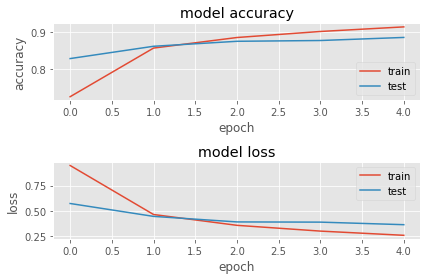

In [57]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [58]:
loss_and_metrics_train = model.evaluate(X, Y, verbose=2)
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Train Loss", loss_and_metrics_train[0])
print("Train Accuracy", loss_and_metrics_train[1])
print()
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Train Loss 0.8594263006687164
Train Accuracy 0.753849983215332

Test Loss 0.8866730060714941
Test Accuracy 0.7451121807098389


In [ ]:
## For predictions - thus might be useful for the second task as well

In [177]:
# This code provides the predicted classes
predictions_nn2 = model.predict_classes(X_test)
print(predictions_nn2)
print(numpy.unique(predictions_nn2))

[24 21 13 ...  3 21  4]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


In [82]:
# This code provides the predictions
#model.predict(X_test)

In [169]:
cm = metrics.confusion_matrix(y_test, predictions_nn2)

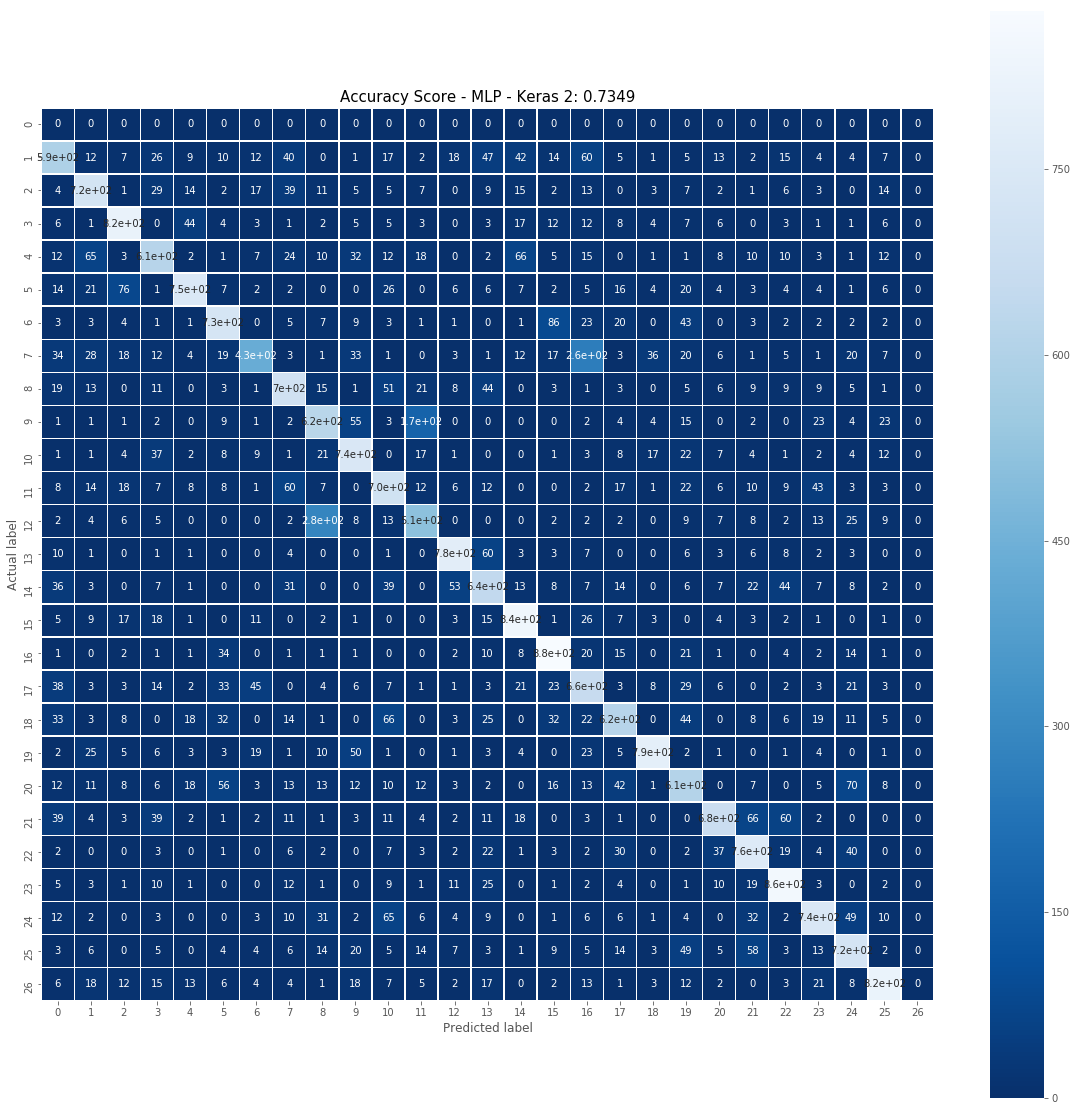

In [174]:
plt.figure(figsize=(20,20))
sns.heatmap(cm, annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score - MLP - Keras 2: {0}'.format(round(loss_and_metrics[1],4))
plt.title(all_sample_title, size = 15);
plt.savefig('Letters_NN.png')
plt.show()

In [ ]:
## Image can be changed

In [7]:
## Task 2
## Load data
testdata = np.load('test-dataset.npy')
 #   img2 = data["x"] ## test dataset
  #  lbl2 = data["y"]

In [10]:
print(testdata.shape)
print(type(testdata))

(10000, 30, 168)
<class 'numpy.ndarray'>


In [15]:
print(testdata[0,0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 255.
   0.   0.   0.   0. 255.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.  62.   0. 110. 255.   0.   0. 255. 198.   0.   0.   0.
 231.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 255.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0. 230. 249.   0.   0.   0.   0.   0. 118.
   0.   0.   0.   0.   0.   0.   0.   0. 255. 182.   0.   0. 130. 255.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  13.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 255.   0.  31.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0. 255.   0. 225.   0.   0.   0.   0.   0.   0.   0.]


In [16]:
print(testdata[0,0].shape)

(168,)
